## vectors, data, matrices, subsetting

In [1]:
import numpy as np

In [2]:
x = np.array([2,7,5])
x

array([2, 7, 5])

In [3]:
y = np.arange(4,12,3)
y

array([ 4,  7, 10])

In [4]:
x + y

array([ 6, 14, 15])

In [5]:
x/y.astype(float)

array([ 0.5,  1. ,  0.5])

In [6]:
x ** y

array([     16,  823543, 9765625])

In [7]:
x[1]

7

In [8]:
x[1:]

array([7, 5])

In [9]:
np.take(x, [0, 2])

array([2, 5])

In [10]:
import numpy.ma as ma
mx = ma.masked_array(x, mask=[1,1,0])
x[mx.mask != True]

array([5])

In [11]:
z = np.arange(1,13).reshape(4,3, order='F')
# z = np.asmatrix(z)
z

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [12]:
z[2:,1:]

array([[ 7, 11],
       [ 8, 12]])

In [13]:
z[:,1:3]

array([[ 5,  9],
       [ 6, 10],
       [ 7, 11],
       [ 8, 12]])

In [14]:
# returns vector
z[:,0]

array([1, 2, 3, 4])

In [15]:
# retain matrix/shape
z[:,[0]]

array([[1],
       [2],
       [3],
       [4]])

In [16]:
z.shape

(4L, 3L)

## Generating random data, graphics

### Matplotlib

In [17]:
import matplotlib.pyplot as plt

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [18]:
x = np.random.uniform(size=50)
y = np.random.normal(size=50)

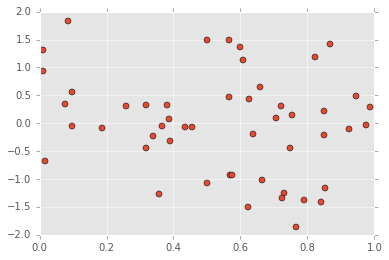

In [19]:
plt.plot(x,y, 'o')

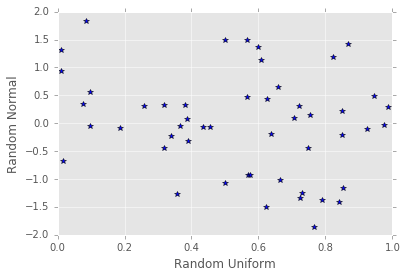

In [20]:
plt.plot(x,y, 'b*')
plt.xlabel('Random Uniform')
plt.ylabel('Random Normal')

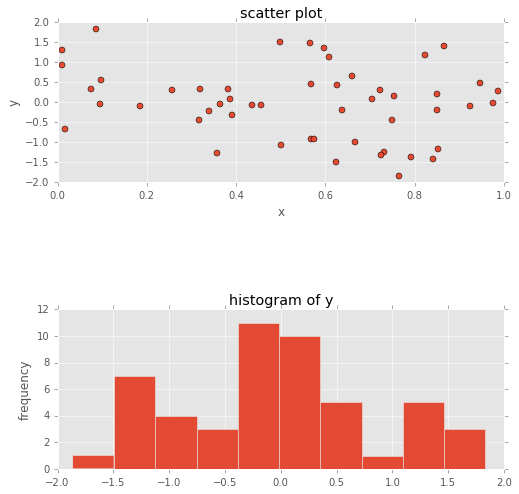

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
axes[0].plot(x,y,'o')
axes[0].set_title('scatter plot')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].hist(y)
axes[1].set_title('histogram of y')
axes[1].set_ylabel('frequency')

fig.subplots_adjust(hspace=0.8)
plt.show()

## Reading in Data

In [22]:
import pandas as pd

In [23]:
Auto = pd.read_csv('../data_sets/Auto.csv')
Auto.columns

Index([u'mpg', u'cylinders', u'displacement', u'horsepower', u'weight',
       u'acceleration', u'year', u'origin', u'name'],
      dtype='object')

In [24]:
print Auto.shape
print type(Auto)

(397, 9)
<class 'pandas.core.frame.DataFrame'>


In [25]:
# summary statistics
    # for all variables
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


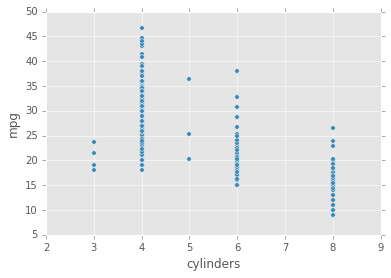

In [26]:
Auto.plot(kind='scatter', x='cylinders', y='mpg')

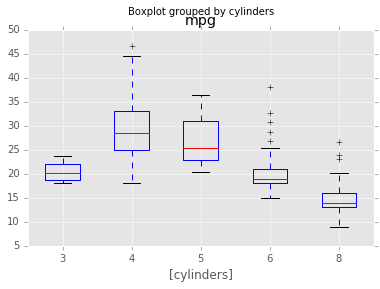

In [27]:
Auto[['cylinders', 'mpg']].boxplot(by='cylinders')

In [28]:
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [29]:
# change var type
print Auto.dtypes.cylinders
Auto['cylinders'] = Auto['cylinders'].astype(object)
print Auto.dtypes.cylinders

int64
object


In [30]:
# TODO: boxplot with color customization

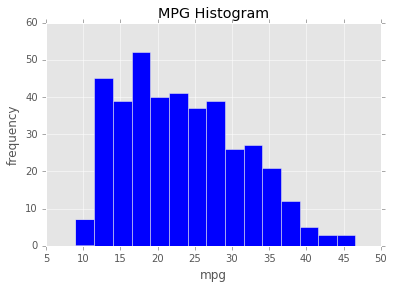

In [31]:
Auto.mpg.hist(color='blue', bins=15)
plt.title('MPG Histogram')
plt.xlabel('mpg')
plt.ylabel('frequency')

In [32]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C73E3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DF75588>]], dtype=object)

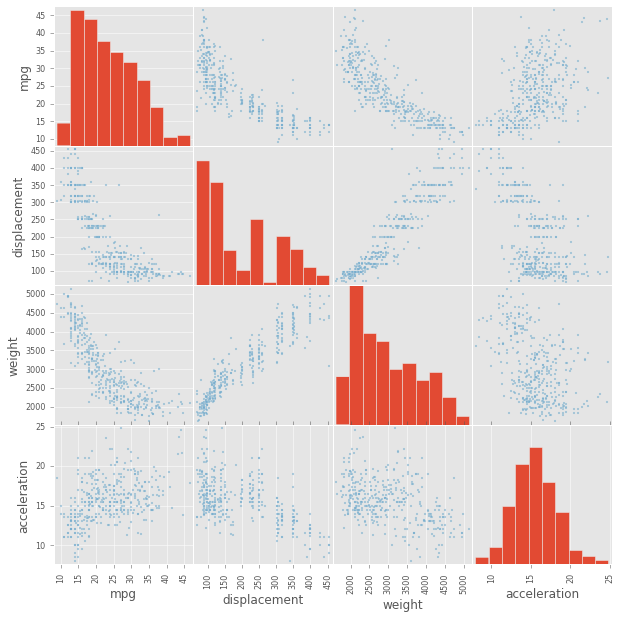

In [33]:
scatter_matrix(Auto[['mpg',  'displacement', 'horsepower', 'weight', 'acceleration']], figsize=(10,10))

In [34]:
# summary statistics
    # for one var
Auto.mpg.describe()

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

## Additional Python Visualizations

### Seaborn

In [36]:
import seaborn as sns

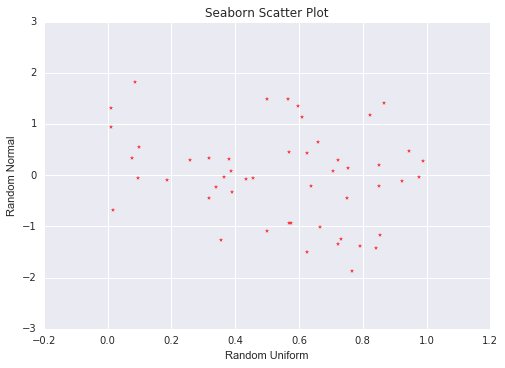

In [58]:
# using x (rand uniform), y (rand normal) from above
sns.regplot(x,y, color='r', marker='*', fit_reg=False)    # avoid use of linear fit
# sns.pointplot(x, y, color='r', markers='*', linestyles='', fit_reg=False)   
sns.axlabel('Random Uniform', 'Random Normal')
sns.plt.title('Seaborn Scatter Plot')

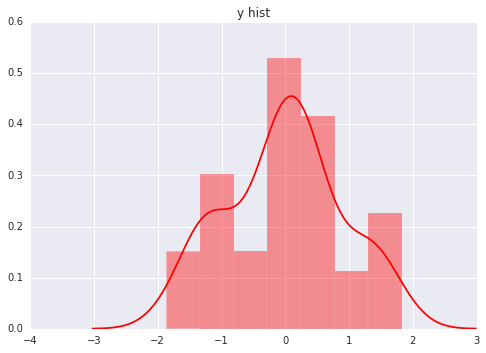

In [70]:
sns.distplot(y, color='r')
sns.plt.title('y hist')

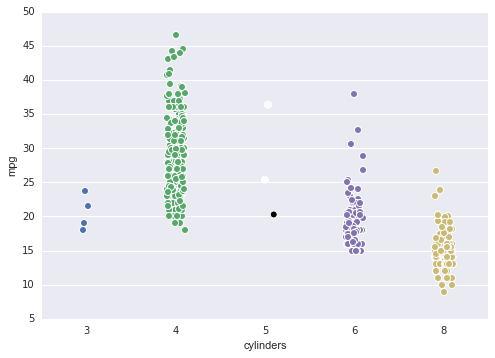

In [73]:
# using Auto data above
cyl_order = [3, 4, 5, 6, 8]
sns.stripplot(x='cylinders', y='mpg', data=Auto, order=cyl_order, jitter=True)

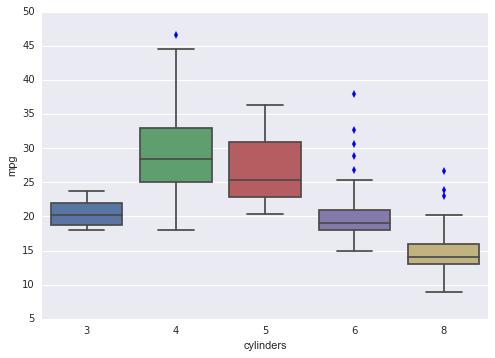

In [74]:
sns.boxplot(x='cylinders', y='mpg', data=Auto, order=cyl_order)

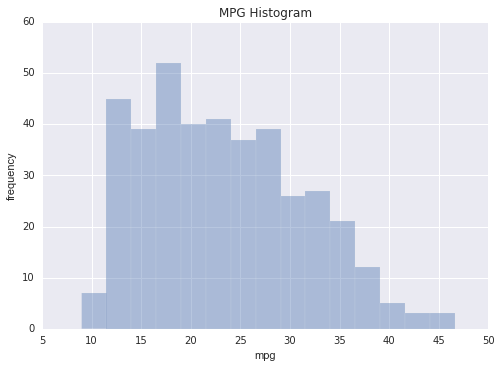

In [69]:
sns.distplot(Auto['mpg'], bins=15, kde=False)    #suppress gaussian kernel density estimate
sns.plt.title('MPG Histogram')
sns.plt.xlabel('mpg')
sns.plt.ylabel('frequency')

C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


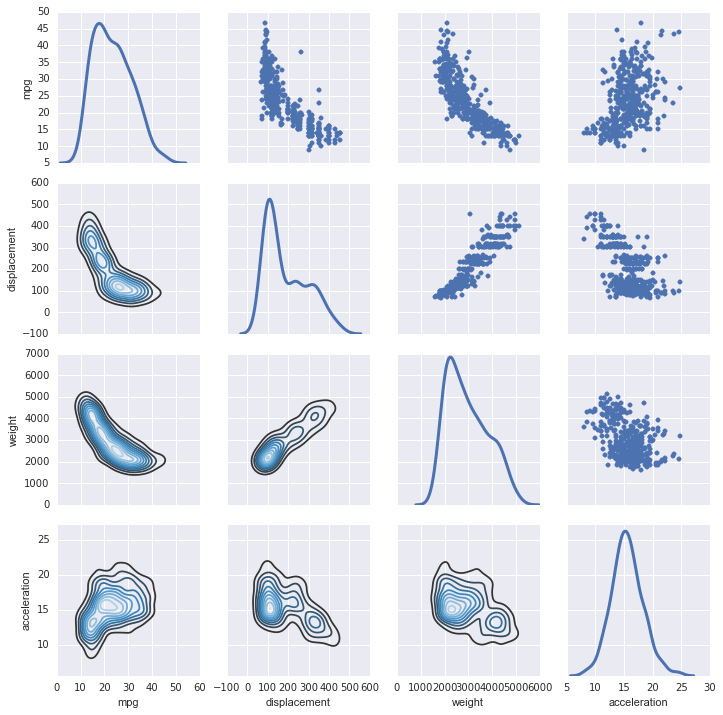

In [77]:
g = sns.PairGrid(Auto[['mpg',  'displacement', 'horsepower', 'weight', 'acceleration']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

### Bokeh

In [78]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook


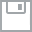
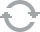
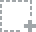
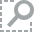
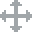
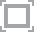
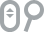
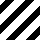
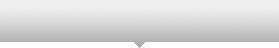
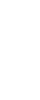
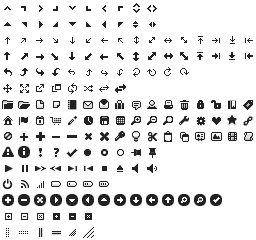
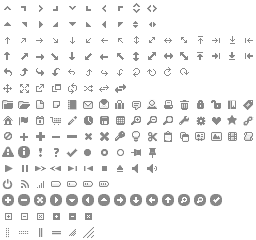
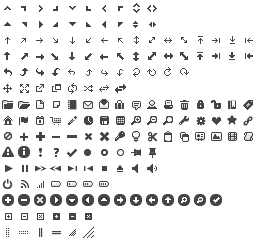
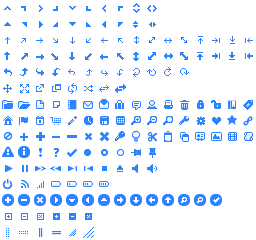
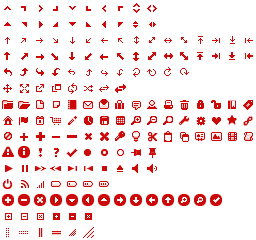
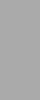
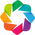
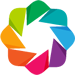

In [79]:
output_notebook()

In [88]:
p = figure(title='Scatter Plot')
p.circle(x, y, size=5, color='navy', fill_alpha=0.6)
p.xaxis.axis_label = "Random Uniform"
p.yaxis.axis_label = "Random Normal"

show(p)